# Import Libraries

In [1]:
import pandas as pd

# Data Preparation

In [2]:
train = pd.read_csv("../input/tanzania-tourism-classification-challenge/Train.csv")
test = pd.read_csv("../input/tanzania-tourism-classification-challenge/Test.csv")
SampleSub = pd.read_csv("../input/tanzania-tourism-classification-challenge/SampleSubmission.csv")

In [3]:
train.head()

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
0,tour_id1hffseyw,ITALY,45-64,With Children,0.0,2.0,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
1,tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
2,tour_id62vz7e71,UNITED STATES OF AMERICA,65+,With Spouse,1.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,No,6,6,Yes,Higher Cost
3,tour_idrc76tzix,RWANDA,25-44,With Spouse and Children,3.0,1.0,Leisure and Holidays,Beach Tourism,"Radio, TV, Web",Independent,...,No,No,No,No,No,No,3,0,No,Lower Cost
4,tour_idn723m0n9,UNITED STATES OF AMERICA,45-64,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,Yes,Yes,7,0,Yes,Higher Cost


### Check for Missing Values

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18506 entries, 0 to 18505
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tour_ID                18506 non-null  object 
 1   country                18506 non-null  object 
 2   age_group              18506 non-null  object 
 3   travel_with            17431 non-null  object 
 4   total_female           18504 non-null  float64
 5   total_male             18500 non-null  float64
 6   purpose                18506 non-null  object 
 7   main_activity          18506 non-null  object 
 8   info_source            18506 non-null  object 
 9   tour_arrangement       18506 non-null  object 
 10  package_transport_int  18506 non-null  object 
 11  package_accomodation   18506 non-null  object 
 12  package_food           18506 non-null  object 
 13  package_transport_tz   18506 non-null  object 
 14  package_sightseeing    18506 non-null  object 
 15  pa

In [5]:
train.isnull().sum()

Tour_ID                     0
country                     0
age_group                   0
travel_with              1075
total_female                2
total_male                  6
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
first_trip_tz               0
cost_category               0
dtype: int64

We have more than 1000 missing values in `travel_with` feature and just 2 missing values in the `total_female` feature.
We might choose to ignore the missing values in the `total_female` feature.

If a the number of male is 1 and there are no females, this indicates that the tourist travelled alone, same thing also vice versa. We would use this information to impute some of the missing values in our training dataset. After we remove any rows with missing data since they are not much.

In [6]:
train.loc[(train["travel_with"].isnull()) &
         (train["total_male"] == 0.0) &
         (train["total_female"] == 1.0),
         "travel_with"
         ] = "Alone"

train.loc[(train["travel_with"].isnull()) &
         (train["total_male"] == 1.0) &
         (train["total_female"] == 0.0),
         "travel_with"
         ] = "Alone"

train.dropna(axis=0, inplace=True)

# Exploratory Data Analysis

Let's see the statistical properties of the numerical features in the trainining data.

In [7]:
train.describe()

,total_female,total_male,night_mainland,night_zanzibar
count,18469.000000,18469.000000,18469.000000,18469.000000
mean,0.932915,0.997834,9.140614,2.495371
std,1.205132,1.172660,14.134502,5.279080
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,3.000000,0.000000
50%,1.000000,1.000000,6.000000,0.000000
75%,1.000000,1.000000,11.000000,4.000000
max,49.000000,58.000000,365.000000,240.000000


Their seems to be an outlier problem, we have tourists that spent 365 and 240 nights in the mainland and zanzibar respectively when the mean number of nights spent is 9 and 2 respectively. Let's take a more closer look at the distribution of these features.

<AxesSubplot:xlabel='night_mainland', ylabel='Density'>

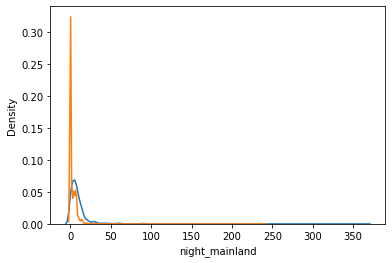

In [8]:
import seaborn as sns
sns.kdeplot(data=train, x="night_mainland")
sns.kdeplot(data=train, x="night_zanzibar")

This proves our point, few tourists have spent more days than average in both locations.

Let's see how travelling alone and in group relates to the touristscost.

In [9]:
train.groupby("country").transform("count")

,Tour_ID,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
0,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618
1,2117,2117,2117,2117,2117,2117,2117,2117,2117,2117,2117,2117,2117,2117,2117,2117,2117,2117,2117,2117
2,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838
3,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145
4,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18501,777,777,777,777,777,777,777,777,777,777,777,777,777,777,777,777,777,777,777,777
18502,777,777,777,777,777,777,777,777,777,777,777,777,777,777,777,777,777,777,777,777
18503,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838
18504,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838,2838


In [10]:
train.groupby(['travel_with',"cost_category"]).agg(count= ('country', 'count')).reset_index()

,travel_with,cost_category,count
0,Alone,High Cost,1333
1,Alone,Higher Cost,783
2,Alone,Highest Cost,23
3,Alone,Low Cost,1164
4,Alone,Lower Cost,1954
5,Alone,Normal Cost,3378
6,With Children,High Cost,98
7,With Children,Higher Cost,228
8,With Children,Highest Cost,11
9,With Children,Low Cost,39


In [11]:
import plotly.express as px
fig = px.histogram(train.groupby(['travel_with',"cost_category"]).agg(count= ('country', 'count')).reset_index(),
                   x="cost_category", y="count",
             color='travel_with', barmode='group',
             height=400)
fig.show()

There seems to be a relationship between `travel_with` feature and the tourist cost, as we can see most tourist who did not come alone fall into the higher costs category. 

train.summary()